# Three Branches of Machine Learning

Machine learning is a field of artificial intelligence that focuses on building systems that can learn from data. It can be broadly categorized into three main branches:

*   **Supervised Learning**
*   **Unsupervised Learning**
*   **Self-supervised Learning**

Each branch addresses different types of problems and utilizes distinct approaches for learning from data.

## Supervised Learning

Supervised learning is a type of machine learning where the model is trained on a labeled dataset, meaning the data includes both the input features and the corresponding output labels. The goal is for the model to learn a mapping function from the input to the output so it can predict the output for new, unseen inputs.

**Key Concepts:**

*   **Labeled Data:** Each data point has an input feature vector $\mathbf{x}$ and a corresponding output label $y$.
*   **Training:** The model learns a function $f$ such that $y \approx f(\mathbf{x})$.
*   **Prediction:** For a new input $\mathbf{x}_{new}$, the model predicts $\hat{y}_{new} = f(\mathbf{x}_{new})$.

**Common Supervised Learning Tasks:**

*   **Classification:** Predicting a categorical output (e.g., spam or not spam).
*   **Regression:** Predicting a continuous output (e.g., house prices).

**Example: Linear Regression**

In linear regression, we try to model the relationship between a dependent variable $y$ and one or more independent variables $\mathbf{x}$ using a linear equation:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$

where:
*   $y$ is the dependent variable
*   $\mathbf{x} = [x_1, x_2, ..., x_n]$ are the independent variables
*   $\beta_0$ is the intercept
*   $\beta_i$ are the coefficients
*   $\epsilon$ is the error term

The model learns the coefficients $\beta_i$ that minimize the difference between the predicted values and the actual values, often using methods like Mean Squared Error (MSE):

$MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$

where:
*   $m$ is the number of data points
*   $\hat{y}_i$ is the predicted value for data point $i$
*   $y_i$ is the actual value for data point $i$

In [1]:
# Example of Linear Regression using scikit-learn
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Load a real-world dataset (e.g., California Housing dataset)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data[:, np.newaxis, 2]  # Use the 'MedInc' feature as the independent variable
y = housing.target # Use the 'target' as the dependent variable

# Create a DataFrame for easier viewing
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target
print("Dataset head:")
display(housing_df.head())

# Reshape X for the model
X = X.reshape(-1, 1)

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make a prediction (using a value within the range of the MedInc feature)
prediction = model.predict([[housing_df['MedInc'].mean()]]) # Example prediction using the mean of the feature
print(f"\nPrediction for average MedInc: {prediction[0]}")

Dataset head:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Prediction for average MedInc: 1.9581212918019568


## Unsupervised Learning

Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. The goal is to find patterns, structures, or relationships within the data without explicit guidance on what the output should be.

**Key Concepts:**

*   **Unlabeled Data:** Data points only have input features $\mathbf{x}$.
*   **Goal:** Discover hidden patterns, structures, or relationships in the data.

**Common Unsupervised Learning Tasks:**

*   **Clustering:** Grouping data points into clusters based on similarity (e.g., customer segmentation).
*   **Dimensionality Reduction:** Reducing the number of features while preserving important information (e.g., PCA).
*   **Association Rule Mining:** Finding relationships between items in a dataset (e.g., "customers who buy milk also buy bread").

**Example: K-Means Clustering**

K-Means clustering is an algorithm that partitions $n$ data points into $k$ clusters, where each data point belongs to the cluster with the nearest mean (centroid). The objective is to minimize the within-cluster sum of squares (WCSS), which is the sum of squared distances between each point and the centroid of its assigned cluster:

$WCSS = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} ||\mathbf{x} - \mu_i||^2$

where:
*   $k$ is the number of clusters
*   $C_i$ is the set of data points in cluster $i$
*   $\mu_i$ is the centroid of cluster $i$

Dataset head:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



Cluster labels (first 10): [0 0 0 2 2 2 2 2 2 2]

Centroids: [[ 7.02918869 25.00174876]
 [ 3.29927444 17.82943604]
 [ 3.19031756 39.37863656]]


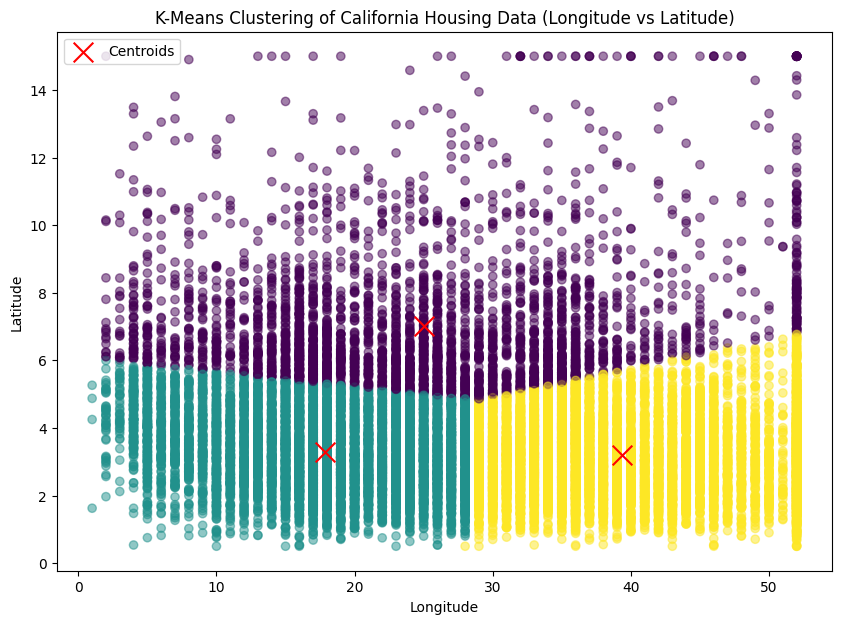

In [2]:
# Example of K-Means Clustering using scikit-learn
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the same real-world dataset
housing = fetch_california_housing()
# Use two features for clustering (e.g., Latitude and Longitude)
X = housing.data[:, [0, 1]]

# Create a DataFrame for easier viewing
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
print("Dataset head:")
display(housing_df.head())


# Apply K-Means
# It's generally a good idea to standardize or normalize data before K-Means
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Determine the optimal number of clusters (e.g., using the elbow method - not implemented here for brevity)
# For this example, let's assume 3 clusters are appropriate for Latitude and Longitude
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels and centroids
labels = kmeans.labels_
# Centroids are in the scaled space, so we can inverse transform them to the original space if needed
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)


print(f"\nCluster labels (first 10): {labels[:10]}")
print(f"\nCentroids: {centroids}")

# Visualize the clusters (using original scale for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 1], X[:, 0], c=labels, cmap='viridis', alpha=0.5) # Using Longitude and Latitude for plotting
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red', s=200, label='Centroids')
plt.title('K-Means Clustering of California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Self-supervised Learning

Self-supervised learning is a relatively newer paradigm where the model learns from data that has been automatically labeled from the data itself. It leverages the inherent structure within the data to create supervisory signals, often by solving a "pretext task" where the labels are generated from the input data. The learned representations from the pretext task can then be transferred to downstream tasks.

**Key Concepts:**

*   **Automatically Generated Labels:** Labels are derived from the input data itself.
*   **Pretext Task:** A task designed to generate labels from the data (e.g., predicting missing parts of an image).
*   **Downstream Task:** The main task for which the learned representations are used.

**Example: Predicting Rotations of Images**

A common self-supervised pretext task for images is predicting the rotation applied to an image. An image is rotated by 0, 90, 180, or 270 degrees, and the model is trained to predict the rotation angle. By learning to predict the rotation, the model learns useful visual features that can be transferred to downstream tasks like image classification.

**Process:**

1.  Take an image.
2.  Rotate it by a random angle (0, 90, 180, or 270 degrees).
3.  Train a model to predict the rotation angle.
4.  The learned feature extractor from this task can then be used for other image-related tasks.

This approach allows models to learn powerful representations from large amounts of unlabeled data, reducing the reliance on manually labeled datasets which can be expensive and time-consuming to create.

In [3]:
# Conceptual example of a self-supervised pretext task (predicting image rotation)
# This is a simplified representation and not a full implementation

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data # Use all features as input data
y = housing.target # Use target as labels for a potential downstream task

# In a real self-supervised task on structured data, you might create a pretext task
# like predicting a masked value or a missing row/column.
# For demonstration purposes, let's create a simple pretext task:
# Predict if a randomly selected feature value is above or below the mean for that feature.

# Select a random feature index
random_feature_index = np.random.randint(0, X.shape[1])
feature_mean = np.mean(X[:, random_feature_index])

# Create pretext labels: 1 if the feature value is above mean, 0 otherwise
pretext_labels = (X[:, random_feature_index] > feature_mean).astype(int)

# Reshape X for the model (if needed, depends on the model architecture)
# For a simple dense network, we can use the original shape
input_shape = X.shape[1]

# Define a simple model for the pretext task
def build_pretext_model(input_shape):
    model = models.Sequential([
        # Simplified feature extractor (e.g., a few dense layers)
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        # Output layer to predict the pretext label (2 classes: above/below mean)
        layers.Dense(1, activation='sigmoid') # Using sigmoid for binary classification
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model

# Build and train the model on the pretext task
pretext_model = build_pretext_model(input_shape)

# Split data for training and testing (optional but good practice)
from sklearn.model_selection import train_test_split
X_train, X_test, pretext_labels_train, pretext_labels_test = train_test_split(
    X, pretext_labels, test_size=0.2, random_state=42
)


print("Training pretext model (predicting if a random feature is above/below its mean)...")
# Train the model
history = pretext_model.fit(X_train, pretext_labels_train, epochs=5, validation_split=0.2)

# Evaluate the model (optional)
loss, accuracy = pretext_model.evaluate(X_test, pretext_labels_test)
print(f"\nPretext task test accuracy: {accuracy}")


# The trained dense layers (feature extractor) can then be used
# for a downstream task by removing the final dense layer and adding new layers
# for the specific task (e.g., predicting housing prices using the original target 'y').

print("\nConceptual example of a self-supervised learning pretext task setup using California Housing data.")
print("The trained model's layers could be used for a downstream task.")

Training pretext model (predicting if a random feature is above/below its mean)...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6486 - loss: 4.6629 - val_accuracy: 0.7436 - val_loss: 0.5943
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6984 - loss: 0.7754 - val_accuracy: 0.7457 - val_loss: 0.5672
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6807 - loss: 0.8444 - val_accuracy: 0.4393 - val_loss: 0.8833
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6790 - loss: 0.9304 - val_accuracy: 0.7472 - val_loss: 0.9263
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6985 - loss: 0.8460 - val_accuracy: 0.7557 - val_loss: 0.8020
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7657 - loss: 0.7552  

Pretext task test accuracy: 0.7691376209259033

Conceptual example of a self-supervised learning pretext task setup using California Housing data.
The trained model's layers could be used for a downstream task.


## Summary and Conclusion

### Summary

This notebook explored the three main branches of machine learning:

*   **Supervised Learning:** Learning from labeled data to make predictions (e.g., Classification, Regression).
*   **Unsupervised Learning:** Finding patterns in unlabeled data (e.g., Clustering, Dimensionality Reduction).
*   **Self-supervised Learning:** Generating labels from the data itself to learn representations for downstream tasks (e.g., Predicting image rotations).

### Conclusion

Machine learning offers powerful tools for solving a wide range of problems. Choosing the right approach depends on the nature of the data and the specific task at hand.

### Key Takeaways:

*   Labeled data is essential for supervised learning.
*   Unsupervised learning is valuable for data exploration and pattern discovery.
*   Self-supervised learning is a promising approach for leveraging large amounts of unlabeled data.

Understanding these different branches provides a solid foundation for applying machine learning techniques effectively.